In [150]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score
%matplotlib inline
import matplotlib.pyplot as plt

In [199]:
data = pd.read_csv("..\\TestFiles\\venv\\New folder\\traningData.csv")
data.head()


,Workstation_ID,RMS_Current(A),RMS_Voltage(v),PF,Active_Energy(W-Hr),Active_Energy(KW-Hr),Power(W),Power(KW),Label,Class
0,9,2.910,241.597,0.481,1,0.001,345.078,0.345,0,1
1,9,2.910,241.597,0.481,1,0.001,345.078,0.345,0,1
2,9,2.926,241.568,0.479,1,0.001,347.250,0.347,0,1
3,9,2.933,241.560,0.481,1,0.001,348.929,0.349,0,1
4,9,2.935,241.556,0.481,1,0.001,349.444,0.349,0,1


In [200]:
X = data[['Power(W)','Label']]
y = data[['Class']]
X=np.array(X)
y=y.values.ravel()
print(X.shape,type(X))
print(y.shape,type(y))


(2899, 2) <class 'numpy.ndarray'>
(2899,) <class 'numpy.ndarray'>


In [201]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.3, random_state=42, shuffle= True)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2029, 2)
(2029,)
(870, 2)
(870,)


In [213]:
# print("X TEST: ",X_test[:,0])
# print("original: ",y_test[:,0])
C = [0.001, 0.01, 0.1, 1, 10, 100,1000]  # SVM regularization parameter
g = [0.0001, 0.001, 0.01, 1] 
model= svm.SVC(C=C[1], kernel= 'rbf', gamma= g[1])
model.fit(X_train,y_train)
predections= model.predict(X_test)
accuracy= accuracy_score(y_test,predections)

# print("Predictions: ",predections)
print("Accuracy: ", accuracy)

Accuracy:  0.8908045977011494


In [214]:
# data1 = pd.read_csv("..\\TestFiles\\venv\\New folder\\crossValidation.csv")
# X_crossV = data1[['Power(W)','Label']]
# y_crossV = data1[['Class']]
# X_crossV=np.array(X_crossV)
# y_crossV=y_crossV.values.ravel()

In [215]:
predictions= model.predict(X_crossV)
print(f'Accuracy of model is {accuracy_score(y_crossV,predictions)}')

Accuracy of model is 0.875


In [216]:
predictions1=predictions==1
predictions2=predictions==2
print(data1.loc[predictions2,'Power(W)'])

0      364.902
1      391.689
3      372.065
4      387.350
5      389.445
        ...   
992    374.622
995    392.862
996    393.678
997    384.041
998    367.013
Name: Power(W), Length: 626, dtype: float64


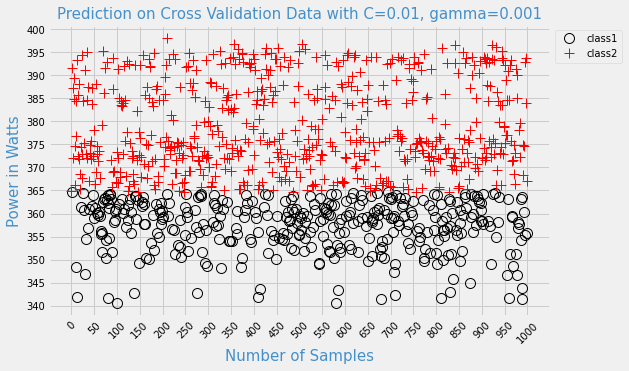

In [223]:
class1= data1.loc[predictions1,'Power(W)']
class2=data1.loc[predictions2,'Power(W)'] 
plt.plot(class1, marker='o', linestyle='none', markersize=10,label='class1',markerfacecolor='none',color='k')
plt.plot(class2, marker='+', linestyle='none', markersize=10,label='class2',markerfacecolor='none',color='r')

plt.rcParams['figure.figsize'] = (8.0, 5.0)
plt.style.use('fivethirtyeight')

SMALL_SIZE = 10
MEDIUM_SIZE = 15
BIGGER_SIZE = 20
CUSTOM_SIZE = 15
#plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=CUSTOM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.xticks(rotation=45)
plt.xticks(np.arange(0,1050,50))
plt.yticks(np.arange(340, 405,5))
plt.xlabel('Number of Samples',color='#4390cb')
plt.ylabel('Power in Watts',color='#4390cb')
plt.title('Prediction on Cross Validation Data with C=0.01, gamma=0.001',color='#4390cb')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

### Randomly selected 500 rows

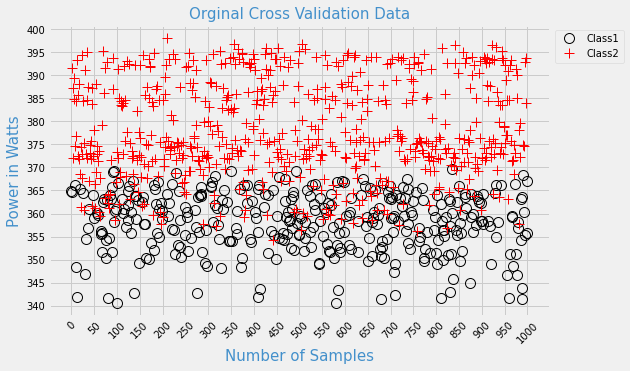

In [227]:
y_test1=data1['Class']==1
y_test2=y_test=data1['Class']==2
class1= data1.loc[y_test1,'Power(W)']
class2=data1.loc[y_test2,'Power(W)'] 
plt.plot(class1, marker='o', linestyle='none', markersize=10,label='Class1',markerfacecolor='none',color='k')
plt.plot(class2, marker='+', linestyle='none', markersize=10,label='Class2',markerfacecolor='none',color='r')
plt.xticks(rotation=45)
plt.xticks(np.arange(0,1050,50))
plt.yticks(np.arange(340, 405,5))
plt.xlabel('Number of Samples',color='#4390cb')
plt.ylabel('Power in Watts',color='#4390cb')
plt.title('Orginal Cross Validation Data',color='#4390cb')
plt.legend(bbox_to_anchor=(1,1))
plt.show()



# n = 500  # for random indices
# index = np.random.choice(X.shape[0], n, replace=False) 
# selected= data.iloc[index]
# selected.to_csv('selected500.csv')
# data.drop(index,inplace=True)


In [10]:
# data.to_csv('measurements1500.csv')

In [13]:
# #data= pd.read_csv('measurements1500.csv')
# data.rename(columns={'Unnamed: 0': 'Row_Index'},inplace=True)

In [28]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [30]:
X_2d = iris.data[:, :2]
X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1
print(X_2d)
print(y_2d)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [33]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[0]

array([-0.90068117,  1.01900435, -1.34022653, -1.3154443 ])

In [230]:
a = np.random.randn(3, 3)
b = np.random.randn(3, 1)
c = a*b

In [231]:
c.shape

(3, 3)

In [232]:
a = np.random.randn(2, 3) # a.shape = (2, 3)
b = np.random.randn(2, 1) # b.shape = (2, 1)
c = a + b
c.shape

(2, 3)

In [235]:
a = np.random.randn(4, 3) # a.shape = (4, 3)
b = np.random.randn(3, 2) # b.shape = (3, 2)
c = a*b
c.shape

ValueError: operands could not be broadcast together with shapes (4,3) (3,2) 

In [234]:
b

array([[ 0.25757746],
       [-0.97281119]])